# Transfer Learning

In [10]:
from tensorflow import keras

## Downloading the Pretrained Model

In [11]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
base_model.trainable = False

## Adding New Layers

In [14]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
x = keras.layers.Dense(3)(x)
x = keras.layers.Dropout(0.1)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                             

## Compiling the Model

In [17]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

## Augmenting the Data

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

## Loading the Data

In [20]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('dataset/train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('dataset/valid', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 228 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


## Training the Model

In [ ]:
model.fit(train_it, steps_per_epoch=15, validation_data=valid_it, validation_steps=2, epochs=18)

Epoch 1/18
15/15 [==============================] - 6s 316ms/step - loss: 1.7963 - binary_accuracy: 0.7083 - val_loss: 4.1066 - val_binary_accuracy: 0.4375
Epoch 2/18
15/15 [==============================] - 4s 266ms/step - loss: 1.5814 - binary_accuracy: 0.7328 - val_loss: 1.6749 - val_binary_accuracy: 0.5000
Epoch 3/18
15/15 [==============================] - 4s 291ms/step - loss: 0.7886 - binary_accuracy: 0.7500 - val_loss: 1.3967 - val_binary_accuracy: 0.6250
Epoch 4/18
15/15 [==============================] - 4s 294ms/step - loss: 0.6797 - binary_accuracy: 0.8190 - val_loss: 1.0564 - val_binary_accuracy: 0.6250
Epoch 5/18
15/15 [==============================] - 4s 282ms/step - loss: 0.4714 - binary_accuracy: 0.8276 - val_loss: 0.8024 - val_binary_accuracy: 0.6875
Epoch 6/18
15/15 [==============================] - 4s 287ms/step - loss: 0.3762 - binary_accuracy: 0.8793 - val_loss: 0.7881 - val_binary_accuracy: 0.7500
Epoch 7/18
15/15 [==============================] - 4s 272ms/ste

## Fine-Tuning the Model

In [ ]:
# Unfreeze the base model
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(train_it, steps_per_epoch=15, validation_data=valid_it, validation_steps=2, epochs=8)

Epoch 1/8
15/15 [==============================] - 5s 367ms/step - loss: 0.2328 - binary_accuracy: 0.9483 - val_loss: 0.2873 - val_binary_accuracy: 0.7500
Epoch 2/8
15/15 [==============================] - 5s 320ms/step - loss: 0.0422 - binary_accuracy: 0.9828 - val_loss: 0.5202 - val_binary_accuracy: 0.7500
Epoch 3/8
15/15 [==============================] - 5s 304ms/step - loss: 0.2190 - binary_accuracy: 0.9655 - val_loss: 0.4166 - val_binary_accuracy: 0.8750
Epoch 4/8
15/15 [==============================] - 5s 299ms/step - loss: 0.1390 - binary_accuracy: 0.9500 - val_loss: 0.0252 - val_binary_accuracy: 1.0000
Epoch 5/8
15/15 [==============================] - 5s 311ms/step - loss: 0.0258 - binary_accuracy: 0.9917 - val_loss: 0.1439 - val_binary_accuracy: 0.8750
Epoch 6/8
15/15 [==============================] - 5s 319ms/step - loss: 0.0566 - binary_accuracy: 0.9828 - val_loss: 0.4322 - val_binary_accuracy: 0.8125
Epoch 7/8
15/15 [==============================] - 5s 356ms/step - los

## Examining the Predictions

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.math import confusion_matrix

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.show()

def make_predictions(image_path):
    # show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # plt.imshow(image)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

def make_label_n_predict(dir,current_label, label_set = [0,1], if_print = None):
    print(f"{current_label} value in progress")
    label_list = []
    preds_actual = []
    pred_list = []
    for filename in os.listdir(dir):
        label_list.append(current_label)
        f = os.path.join(dir, filename)
        # checking if it is a file
        if os.path.isfile(f):
            pred = make_predictions(f)[0][0]
            preds_actual.append(pred)
            if pred > -1.2:
                if if_print == 1:
                    print(pred)
                    show_image(f)
                pred_list.append(label_set[1])
            else:
                if if_print == 0:
                    print(pred)
                    show_image(f)
                pred_list.append(label_set[0])
    print(min(preds_actual),max(preds_actual))
    return label_list, pred_list


Get confusion matrix

In [43]:
import numpy as np
import itertools
import tensorflow as tf

def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # # Normalize the confusion matrix.
    # cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

1 value in progress
-4.30207


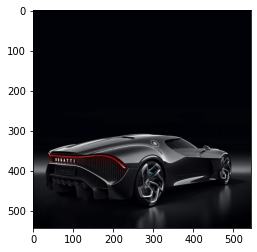

-4.30207 13.776284
0 value in progress
-22.400742 -5.0755005

confusion matrix:
Figure(576x576)


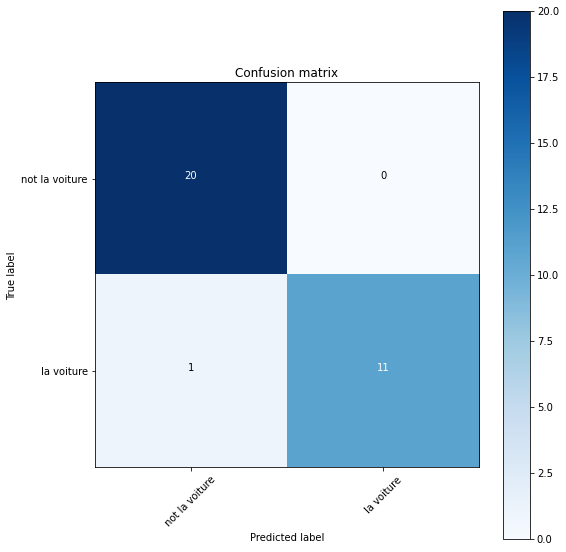

In [46]:

# yes
dir = "dataset/valid/yes"
current_label = 1
yes_label, yes_pred = make_label_n_predict(dir,current_label, if_print = 0)

# no
dir = "dataset/valid/no"
current_label = 0
no_label, no_pred = make_label_n_predict(dir,current_label,  if_print = 1)

y_label = yes_label + no_label
y_pred = yes_pred + no_pred

print()
print("confusion matrix:")
cm = confusion_matrix(y_label, y_pred)
proto_tensor = tf.make_tensor_proto(cm)
array = tf.make_ndarray(proto_tensor)

classes = np.asarray(["not la voiture", "la voiture"])

print(plot_confusion_matrix(array, classes))

Save Model

In [ ]:
model.save('model_bkp')

INFO:tensorflow:Assets written to: model_2_bkp/assets


Load Model

In [21]:
model = keras.models.load_model("model_2_bkp")